# Traffic Flow Management using Machine Learning
**Objective:** Predict noise levels (Leq) from traffic flow data using machine learning.  

**Project Overview:**  
Built an AI-based congestion prediction system that processes real-time data to forecast traffic with 99.9% accuracy. Implemented data preprocessing, ML model training, and evaluation.  
**Tools Used:** Python, Pandas, Scikit-learn, Matplotlib

 **Key Takeaways:**  
 - Achieved ** accuracy** (R²) with Gradient Boosting/XGBoost.  
 - Identified traffic density as the strongest noise predictor.  
 - Neural networks failed due to overfitting (R² = -101).

**Status:** Completed (Pending Deployment)



In [39]:
# !pip install pandas


In [40]:
import pandas as pd
import numpy as np
df = pd.read_excel('Final_Dataset.xlsx')
df.sample(10)


,S. No.,Peak type,2-w (V),2-w (S),Vikram (V),Vikram (S),Car (V),Car (S),Auto (V),Auto (S),...,Lane Width (m),IDSS (m),IDOS (m),Median (m),Leq,Landuse,Wind Speed (m/s),Relative Humidity (%),Atm Pressure (mBar),Temperature (0C)
444,8.0,Afternoon,1553.0,35.614804,71.0,28.766667,412.0,35.266247,377.0,32.173077,...,7.50,16.25,23.95,0.20,68.9,Residential,1.780000,77.700000,984.600000,29.200000
250,78.0,Evening,2349.0,38.500000,334.0,30.000000,704.0,37.500000,161.0,31.000000,...,6.00,10.00,17.50,1.50,74.1,Commercial,3.000000,47.000000,1014.000000,22.000000
376,28.0,Morning,2698.0,40.295245,267.0,32.659148,403.0,39.099165,98.0,31.363077,...,7.50,21.70,13.75,0.45,74.1,Residential,0.668711,65.182422,986.560150,32.476090
48,49.0,Morning,1162.0,45.000000,197.0,30.000000,615.0,52.000000,30.0,37.000000,...,5.25,12.62,17.87,0.00,74.1,Commercial,1.432108,44.513139,999.362056,27.531778
504,68.0,Afternoon,1638.0,35.117279,167.0,29.955221,460.0,33.957555,149.0,30.426901,...,7.50,6.75,14.25,0.00,74.1,Industrial,1.890000,53.900000,982.867306,36.643444
6,7.0,Morning,2006.0,33.000000,147.0,26.000000,571.0,34.000000,493.0,28.000000,...,7.50,16.25,23.95,0.20,70.9,Residential,0.762340,36.172542,999.747681,29.860884
417,69.0,Evening,1952.0,32.202205,113.0,27.169319,337.0,32.364355,155.0,27.479488,...,7.50,6.75,14.25,0.00,76.0,Industrial,1.350106,63.172036,980.179811,33.857734
302,42.0,Evening,2301.0,38.744274,132.0,30.938045,1088.0,38.041556,212.0,34.030083,...,6.00,9.00,18.20,3.20,75.0,Silence,1.201242,39.993861,1001.131000,25.747306
55,56.0,Afternoon,1619.0,40.500000,205.0,29.000000,732.0,44.500000,44.0,35.500000,...,6.50,7.75,14.25,0.00,75.3,Industrial,0.763068,43.990247,999.360934,26.206530
264,4.0,Morning,2538.0,37.280085,4.0,23.000000,326.0,35.644829,821.0,31.505526,...,7.50,9.25,19.75,1.50,73.3,Commercial,0.606664,61.064139,999.516139,22.478472


In [41]:
df.shape

(521, 37)

In [42]:
df.describe()

,S. No.,2-w (V),2-w (S),Vikram (V),Vikram (S),Car (V),Car (S),Auto (V),Auto (S),LCV (V),...,Total (V),Lane Width (m),IDSS (m),IDOS (m),Median (m),Leq,Wind Speed (m/s),Relative Humidity (%),Atm Pressure (mBar),Temperature (0C)
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,...,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,42.500000,1817.750000,36.113505,132.090079,28.713935,561.853175,35.914094,182.126984,30.793482,60.344048,...,3245.349603,6.321429,11.712143,16.862143,1.717857,73.272117,2.782314,51.670320,998.624834,28.699811
std,24.271083,670.517035,4.805958,105.497475,3.673830,259.446908,5.686200,192.122289,3.519603,62.531708,...,1099.596028,1.282764,5.176016,5.656584,3.789147,2.308312,3.127187,15.487647,13.306172,5.345503
min,1.000000,447.000000,26.500000,0.200000,20.000000,62.000000,23.500000,15.000000,23.500000,0.200000,...,893.600000,3.500000,5.500000,5.500000,0.000000,67.000000,0.000000,23.000000,898.200000,14.000000
25%,21.750000,1409.500000,32.440588,51.000000,26.000000,401.000000,32.000000,53.500000,28.403022,12.000000,...,2480.250000,5.500000,7.250000,12.750000,0.000000,71.700000,0.779298,39.044783,987.950000,25.659569
50%,42.500000,1764.000000,35.500000,112.000000,28.000000,550.000000,34.901466,100.000000,30.114998,38.500000,...,3235.700000,6.250000,10.000000,17.500000,0.475000,73.200000,1.199015,50.000000,998.684806,29.000000
75%,63.250000,2276.250000,39.068626,179.500000,30.441050,704.500000,39.263313,207.250000,33.000000,102.000000,...,4014.875000,7.500000,15.125000,21.250000,1.500000,74.700000,5.000000,64.015129,1010.000000,32.723944
max,84.000000,3819.000000,48.808086,473.000000,37.742735,1507.000000,52.000000,821.000000,40.286316,338.000000,...,6206.300000,10.500000,27.250000,27.250000,15.000000,81.100000,14.000000,86.895111,1021.000000,41.001556


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   S. No.                 504 non-null    float64
 1   Peak type              504 non-null    object 
 2   2-w (V)                504 non-null    float64
 3   2-w (S)                504 non-null    float64
 4   Vikram (V)             504 non-null    float64
 5   Vikram (S)             504 non-null    float64
 6   Car (V)                504 non-null    float64
 7   Car (S)                504 non-null    float64
 8   Auto (V)               504 non-null    float64
 9   Auto (S)               504 non-null    float64
 10  LCV (V)                504 non-null    float64
 11  LCV (S)                504 non-null    float64
 12  Tractor (V)            504 non-null    float64
 13  Tractor (S)            504 non-null    float64
 14  Bus (V)                504 non-null    float64
 15  Bus (S

In [44]:
df.duplicated().sum()

np.int64(16)

In [45]:
df=df.drop_duplicates(keep='first')

In [46]:
df.sample(5)

,S. No.,Peak type,2-w (V),2-w (S),Vikram (V),Vikram (S),Car (V),Car (S),Auto (V),Auto (S),...,Lane Width (m),IDSS (m),IDOS (m),Median (m),Leq,Landuse,Wind Speed (m/s),Relative Humidity (%),Atm Pressure (mBar),Temperature (0C)
281,21.0,Evening,579.0,32.828338,10.0,25.000000,109.0,31.837190,213.0,28.733875,...,5.00,5.50,10.50,0.0,72.5,Residential,1.305069,51.724972,1001.876167,22.425194
270,10.0,Morning,1855.0,39.555934,92.0,31.257123,385.0,39.200772,464.0,35.789189,...,7.50,16.25,23.95,0.2,70.6,Residential,0.762340,36.172542,999.747681,29.860884
400,52.0,Morning,1238.0,40.500779,138.0,37.742735,645.0,42.830398,59.0,36.598039,...,5.25,12.62,17.87,0.0,73.5,Commercial,1.247387,74.331158,984.961372,32.050764
382,34.0,Morning,1389.0,32.594951,103.0,30.474694,569.0,32.726923,49.0,29.530749,...,6.50,16.25,9.25,0.5,70.6,Commercial,1.547720,59.488475,985.856207,35.560594
271,11.0,Afternoon,1925.0,38.189308,93.0,30.102273,334.0,37.634859,476.0,34.942063,...,7.50,16.25,23.95,0.2,70.2,Residential,0.646119,34.480528,999.196556,28.919556


In [47]:
df.describe()

,S. No.,2-w (V),2-w (S),Vikram (V),Vikram (S),Car (V),Car (S),Auto (V),Auto (S),LCV (V),...,Total (V),Lane Width (m),IDSS (m),IDOS (m),Median (m),Leq,Wind Speed (m/s),Relative Humidity (%),Atm Pressure (mBar),Temperature (0C)
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,...,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,42.500000,1817.750000,36.113505,132.090079,28.713935,561.853175,35.914094,182.126984,30.793482,60.344048,...,3245.349603,6.321429,11.712143,16.862143,1.717857,73.272117,2.782314,51.670320,998.624834,28.699811
std,24.271083,670.517035,4.805958,105.497475,3.673830,259.446908,5.686200,192.122289,3.519603,62.531708,...,1099.596028,1.282764,5.176016,5.656584,3.789147,2.308312,3.127187,15.487647,13.306172,5.345503
min,1.000000,447.000000,26.500000,0.200000,20.000000,62.000000,23.500000,15.000000,23.500000,0.200000,...,893.600000,3.500000,5.500000,5.500000,0.000000,67.000000,0.000000,23.000000,898.200000,14.000000
25%,21.750000,1409.500000,32.440588,51.000000,26.000000,401.000000,32.000000,53.500000,28.403022,12.000000,...,2480.250000,5.500000,7.250000,12.750000,0.000000,71.700000,0.779298,39.044783,987.950000,25.659569
50%,42.500000,1764.000000,35.500000,112.000000,28.000000,550.000000,34.901466,100.000000,30.114998,38.500000,...,3235.700000,6.250000,10.000000,17.500000,0.475000,73.200000,1.199015,50.000000,998.684806,29.000000
75%,63.250000,2276.250000,39.068626,179.500000,30.441050,704.500000,39.263313,207.250000,33.000000,102.000000,...,4014.875000,7.500000,15.125000,21.250000,1.500000,74.700000,5.000000,64.015129,1010.000000,32.723944
max,84.000000,3819.000000,48.808086,473.000000,37.742735,1507.000000,52.000000,821.000000,40.286316,338.000000,...,6206.300000,10.500000,27.250000,27.250000,15.000000,81.100000,14.000000,86.895111,1021.000000,41.001556


In [48]:
df.duplicated().sum()

np.int64(0)

In [49]:
df.isnull().sum()

,0
S. No.,1
Peak type,1
2-w (V),1
2-w (S),1
Vikram (V),1
Vikram (S),1
Car (V),1
Car (S),1
Auto (V),1
Auto (S),1


In [50]:
print(df[df.isnull().any(axis=1)])

    S. No. Peak type  2-w (V)  2-w (S)  Vikram (V)  Vikram (S)  Car (V)  \
84     NaN       NaN      NaN      NaN         NaN         NaN      NaN   

    Car (S)  Auto (V)  Auto (S)  ...  Lane Width (m)  IDSS (m)  IDOS (m)  \
84      NaN       NaN       NaN  ...             NaN       NaN       NaN   

    Median (m)  Leq  Landuse  Wind Speed (m/s)  Relative Humidity (%)  \
84         NaN  NaN      NaN               NaN                    NaN   

    Atm Pressure (mBar)  Temperature (0C)  
84                  NaN               NaN  

[1 rows x 37 columns]


In [51]:
df.dropna(how='all', inplace=True)

In [52]:
df.isnull().sum()

,0
S. No.,0
Peak type,0
2-w (V),0
2-w (S),0
Vikram (V),0
Vikram (S),0
Car (V),0
Car (S),0
Auto (V),0
Auto (S),0


In [53]:
df = df.drop(columns=['S. No.'])


In [54]:
df.head()

,Peak type,2-w (V),2-w (S),Vikram (V),Vikram (S),Car (V),Car (S),Auto (V),Auto (S),LCV (V),...,Lane Width (m),IDSS (m),IDOS (m),Median (m),Leq,Landuse,Wind Speed (m/s),Relative Humidity (%),Atm Pressure (mBar),Temperature (0C)
0,Morning,2088.0,29.0,15.0,24.0,318.0,23.5,797.0,23.5,34.0,...,10.5,10.75,21.25,1.5,76.2,Commercial,0.606664,61.064139,999.516139,22.478472
1,Afternoon,3095.0,31.5,25.0,24.0,634.0,26.5,780.0,24.5,338.0,...,10.5,10.75,21.25,1.5,76.9,Commercial,0.926686,53.146333,998.891861,24.507694
2,Evening,2779.0,32.0,32.0,24.0,575.0,26.5,791.0,26.0,283.0,...,10.5,10.75,21.25,1.5,77.7,Commercial,0.784708,48.623028,997.991361,25.931444
3,Morning,2088.0,29.0,15.0,24.0,318.0,23.5,797.0,23.5,34.0,...,7.5,9.25,19.75,1.5,76.6,Commercial,0.606664,61.064139,999.516139,22.478472
4,Afternoon,3095.0,31.5,25.0,24.0,634.0,26.5,780.0,24.5,338.0,...,7.5,9.25,19.75,1.5,75.5,Commercial,0.926686,53.146333,998.891861,24.507694


In [55]:

df = pd.get_dummies(df, columns=["Peak type", "Landuse"], drop_first=True)

In [56]:
df.shape

(504, 39)

In [57]:
df['Traffic Density'] = df['Total (V)'] / df['Lane Width (m)']

In [58]:
df['Noise per vehicle'] = df['Leq'] / df['Total (V)']

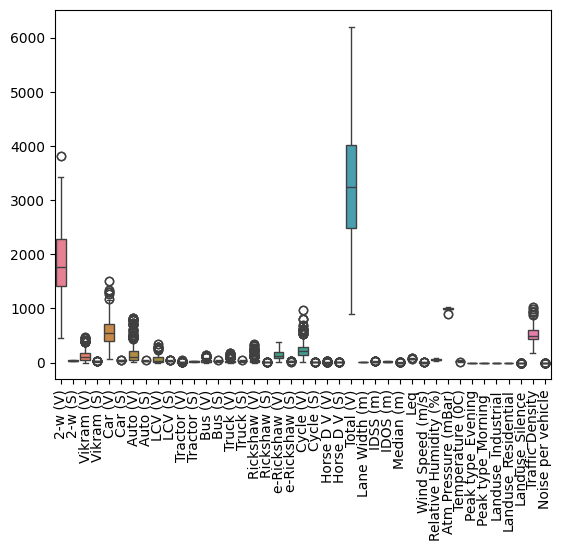

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

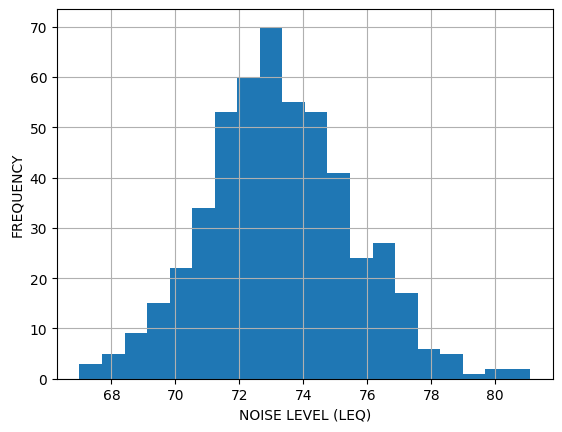

In [60]:
df['Leq'].hist(bins=20)
plt.xlabel("NOISE LEVEL (LEQ)")
plt.ylabel("FREQUENCY")
plt.show()


<Axes: >

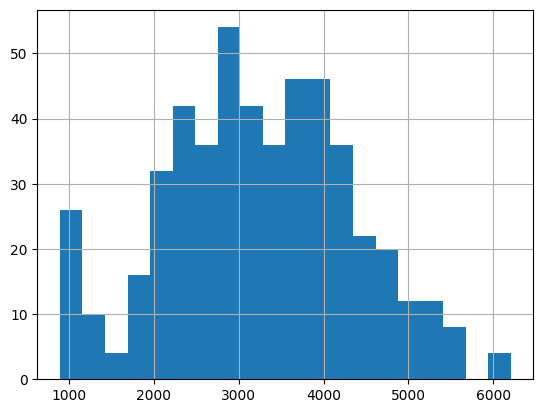

In [61]:
df['Total (V)'].hist(bins=20)


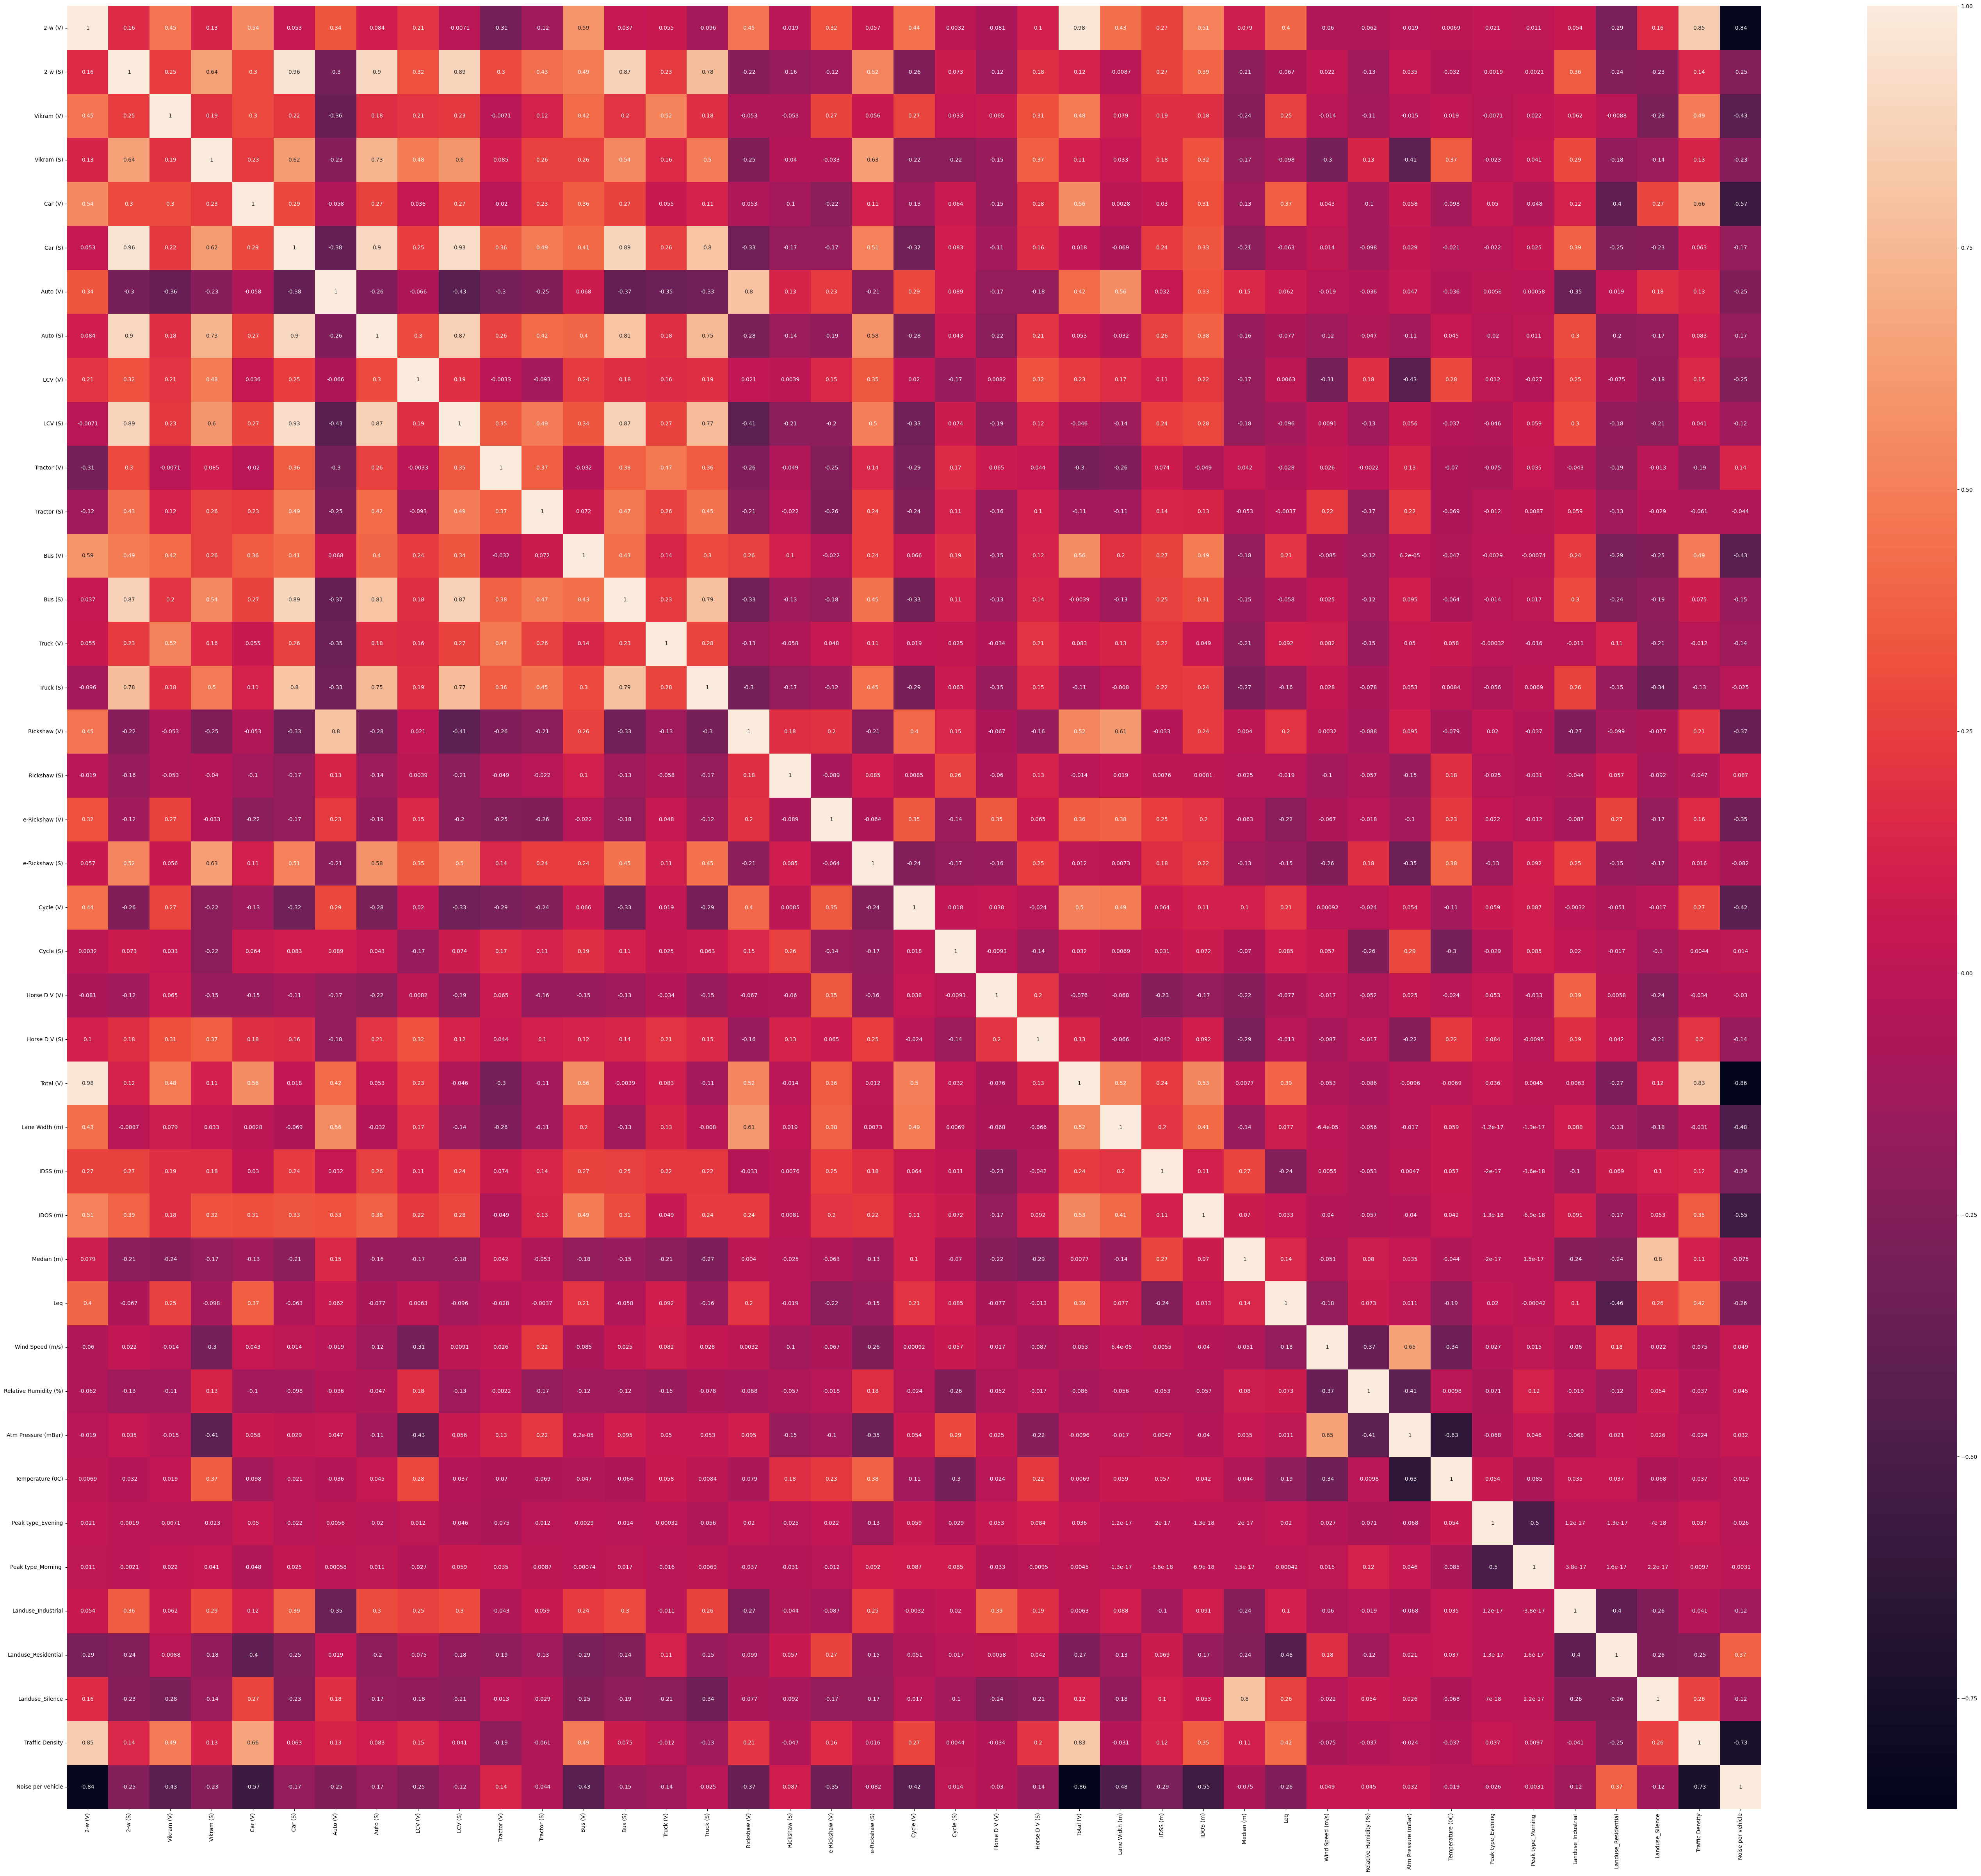

In [62]:
plt.figure(figsize=(70,60))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

#**Figure :** Correlation between traffic density and noise levels. #
- Vehicles like trucks/buses show the highest noise impact.  
- Lane width inversely correlates with noise (wider lanes = quieter).  

In [63]:
df.head()


,2-w (V),2-w (S),Vikram (V),Vikram (S),Car (V),Car (S),Auto (V),Auto (S),LCV (V),LCV (S),...,Relative Humidity (%),Atm Pressure (mBar),Temperature (0C),Peak type_Evening,Peak type_Morning,Landuse_Industrial,Landuse_Residential,Landuse_Silence,Traffic Density,Noise per vehicle
0,2088.0,29.0,15.0,24.0,318.0,23.5,797.0,23.5,34.0,22.0,...,61.064139,999.516139,22.478472,False,True,False,False,False,402.123810,0.018047
1,3095.0,31.5,25.0,24.0,634.0,26.5,780.0,24.5,338.0,22.0,...,53.146333,998.891861,24.507694,False,False,False,False,False,532.609524,0.013751
2,2779.0,32.0,32.0,24.0,575.0,26.5,791.0,26.0,283.0,22.0,...,48.623028,997.991361,25.931444,True,False,False,False,False,492.628571,0.015021
3,2088.0,29.0,15.0,24.0,318.0,23.5,797.0,23.5,34.0,22.0,...,61.064139,999.516139,22.478472,False,True,False,False,False,562.973333,0.018142
4,3095.0,31.5,25.0,24.0,634.0,26.5,780.0,24.5,338.0,22.0,...,53.146333,998.891861,24.507694,False,False,False,False,False,745.653333,0.013500


In [64]:
import sklearn
import pickle

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x=df.drop(columns=["Noise per vehicle"])
y=df["Noise per vehicle"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [66]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [67]:
from xgboost import XGBRegressor

In [68]:
regressor=XGBRegressor()
regressor.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [71]:
y_pred=regressor.predict(x_test)
np.concatenate((y_test.to_numpy().reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),axis=1)

array([[0.01653024, 0.01723297],
       [0.06177868, 0.0626403 ],
       [0.02570225, 0.02589906],
       [0.01479445, 0.01487435],
       [0.03254909, 0.03229558],
       [0.01435158, 0.01456029],
       [0.02505562, 0.02502828],
       [0.02331425, 0.02335587],
       [0.03503233, 0.03643237],
       [0.01464443, 0.01507429],
       [0.03563871, 0.03610196],
       [0.01800871, 0.01838609],
       [0.02593022, 0.02618888],
       [0.02033151, 0.02028575],
       [0.04470043, 0.04480382],
       [0.02612289, 0.02632503],
       [0.01604267, 0.0159468 ],
       [0.02985136, 0.03001359],
       [0.01598725, 0.01620151],
       [0.01589568, 0.0159468 ],
       [0.06220299, 0.06272113],
       [0.01779069, 0.01762524],
       [0.02224338, 0.02219619],
       [0.01623945, 0.01710602],
       [0.0189913 , 0.0189902 ],
       [0.01538429, 0.01588837],
       [0.01894938, 0.01876826],
       [0.04450781, 0.04405659],
       [0.03478811, 0.03556672],
       [0.01654256, 0.01638689],
       [0.

In [72]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9985861950606183


In [73]:
y_predt=regressor.predict(x_train)
print(r2_score(y_train,y_predt))

0.999685256114014


In [76]:
import pickle
with open('traffic_model.pkl', 'wb') as f:
    pickle.dump(regressor, f)